In [1]:
#AML 11/14/15
#testing setting up the true labels for the polyASite2.0 Datasets for the sklearn.metrics.roc_curve 

#testing roc_curve
import numpy as np
import sklearn as sk
from sklearn import metrics
import matplotlib.pyplot as plt
import math
import pandas as pd

#y = np.array([1, 1, 2, 2,1,2])
#scores = np.array([0.1, 0.4, 0.35, 0.8,0.6,1.0])
#fpr, tpr, thresholds = sk.metrics.roc_curve(y, scores, pos_label=2)
#print ("FPR: ", fpr)
#print ("TPR: ", tpr)
#print ("Thresholds: ", thresholds)

#functions for calculating the 3 most common threshold choosing techniques:
#1) Threshold w/max distance from the 45 degree line
#2) Threshold w/min distance to point where Sensitivity=Specificity
#3) Threshold w/min distance to (1,1)

def maxPosDist45DegreeLine(fpr,tpr, threshs):
    #fpr is x, tpr is y
    #find the fpr,tpr,and threshold of the ROC point with the maximum positive distance from the 45 degree line
    maxPosDist = -1
    maxIndex = 0
    for i in range(0,len(fpr)):
        if tpr[i] >=fpr[i]: #above or on the 45 degree line
            currPosDist = tpr[i] - fpr[i] #since 45 degree line is y=x
            if currPosDist >= maxPosDist:
                    maxPosDist = currPosDist 
                    maxIndex = i
    if maxPosDist == -1:
        return None
    else:
        return fpr[maxIndex], tpr[maxIndex], threshs[maxIndex], maxPosDist


def findSpecifictySensitivityEqualityPoint(fpr,tpr,threshs):
    #find the prediction closest to where sensitivity=specificity
    minDiff = math.sqrt(2) #maximum possible distance for the unit cube of the ROC curve
    minIndex = 0
    for i in range(0,len(fpr)):
        if fpr[i] != 0.0 and tpr[i] != 0.0: #will always choose (0,0) if not blocked from doing so
            se = tpr[i]
            sp = 1 - fpr[i]
            currDiff = math.fabs(se-sp)
            if currDiff < minDiff:
                minDiff = currDiff
                minIndex = i
    if minDiff != math.sqrt(2):
        return fpr[minIndex], tpr[minIndex], threshs[minIndex], minDiff
    
def minDistanceTopLeftCorner(fpr,tpr,threshs):
    #find the prediction closest to (1,1)
    minDist = math.sqrt(2) #maximum possible distance for the unit cube of the ROC curve
    minIndex = 0
    for i in range(0,len(fpr)):
        currDist = math.sqrt((fpr[i])**2 + (1-tpr[i])**2)
        #print (currDist)
        if currDist < minDist:
            minDist = currDist
            minIndex = i
    if minDist != math.sqrt(2):
        return fpr[minIndex], tpr[minIndex], threshs[minIndex], minDist

    

'''    
posDistFPR, posDistTPR, posDistThresh, x  = maxPosDist45DegreeLine(fpr,tpr,thresholds)
equalFPR, equalTPR, equalThresh, x  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)
closeFPR, closeTPR, closeThresh, x  = minDistanceTopLeftCorner(fpr,tpr,thresholds)
print ("maxDistFPR: ", posDistFPR, " maxDistTPR: ", posDistTPR, "Threshold: ", posDistThresh)
print ("equalFPR: ", equalFPR, " equalTPR: ", equalTPR, "Threshold: ", equalThresh)
print ("closestFPR: ", equalFPR, " closestTPR: ", equalTPR, "Threshold: ", equalThresh)
plt.plot(fpr, tpr, )
plt.scatter(posDistFPR,posDistTPR, c = "blue",label = "Maxmimum Distance from 45")
plt.scatter(equalFPR,equalTPR, c = "red", label = "Closest to FPR=TPR")
plt.scatter(closeFPR, closeTPR, c = "green", label = "Closest to (1,1)")
plt.title("Demo ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

#the number of true positives in the entire genome is 5425800 (includes overlapping regions too)
#which means very spare signal to recover.....
'''


'    \nposDistFPR, posDistTPR, posDistThresh, x  = maxPosDist45DegreeLine(fpr,tpr,thresholds)\nequalFPR, equalTPR, equalThresh, x  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)\ncloseFPR, closeTPR, closeThresh, x  = minDistanceTopLeftCorner(fpr,tpr,thresholds)\nprint ("maxDistFPR: ", posDistFPR, " maxDistTPR: ", posDistTPR, "Threshold: ", posDistThresh)\nprint ("equalFPR: ", equalFPR, " equalTPR: ", equalTPR, "Threshold: ", equalThresh)\nprint ("closestFPR: ", equalFPR, " closestTPR: ", equalTPR, "Threshold: ", equalThresh)\nplt.plot(fpr, tpr, )\nplt.scatter(posDistFPR,posDistTPR, c = "blue",label = "Maxmimum Distance from 45")\nplt.scatter(equalFPR,equalTPR, c = "red", label = "Closest to FPR=TPR")\nplt.scatter(closeFPR, closeTPR, c = "green", label = "Closest to (1,1)")\nplt.title("Demo ROC Curve")\nplt.xlabel("FPR")\nplt.ylabel("TPR")\nplt.legend()\nplt.show()\n\n#the number of true positives in the entire genome is 5425800 (includes overlapping regions too)\n#which m

179198


/home/lafleur1/anaconda2/envs/aparent_proj/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total true labelled positions:  353.0
Total length of contig:  179198
Fraction of NT's which are APA sites:  0.001969888056786348


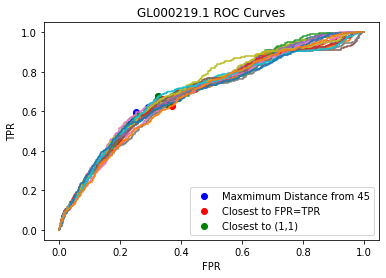

Best AUC is  0.7114515972295317  with stride length  35


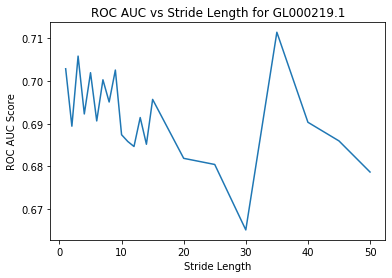

In [2]:
#Opening GL000219.1 predictions
strideSizes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50]
names = ["GL000219.1"]
predStem = "./PredictionBinaries/"
pred_slide1 = np.load("./PredictionBinaries/GL000219.1Predictions/GL000219_1_cutPredsStrideLen3.npy")
print (pred_slide1.size)

#opening all the true values
colnames = ["seqName",  "start" , "end",  "clusterID",  "avgTPM",  "strand",   "percentSupporting",   "protocolsSupporting",  "avgTPM2",   "type",   "upstreamClusters"]
pas_stuff =pd.read_csv('atlas.clusters.hg38.2-0.bed',delimiter='\t', names = colnames) 


def computeAndGraphAllROCs(name,sizes):
    nameNoDot = name.replace(".","_")
    extenedCutPredStem = "./PredictionBinaries/" + name + "Predictions/" + nameNoDot + "_cutPredsStrideLen"
    fprs = []
    tprs = []
    threshs = []
    aucs = []
    dist45 = {'fpr':[], 'tpr':[], 'thresholds':[], 'values':[]}
    minEqual = {'fpr':[], 'tpr':[], 'thresholds':[], 'values':[]}
    topLeft = {'fpr':[], 'tpr':[], 'thresholds':[], 'values':[]}
    #set up true value labels
    predForSlide = np.load(extenedCutPredStem + "1.npy") #opening first binary to get length of region
    trueValBoolMask = pas_stuff['seqName'] == name
    currentTrueVals = pas_stuff[trueValBoolMask]
    trueValsArray = np.zeros(predForSlide.size) #create numpy array of all 0's the length of the sequence
    for index, row in currentTrueVals.iterrows():
        trueValsArray[row['start']:row['end']] = 1 #set actual true values to 1 in the array
    print ("Total true labelled positions: ", np.sum(trueValsArray))
    print ("Total length of contig: ", trueValsArray.size)
    print ("Fraction of NT's which are APA sites: ", np.sum(trueValsArray)/trueValsArray.size)
    ######
    #Compute ROC curve and ROC AUC for each stride length
    for size in sizes:
        predForSlide = np.load(extenedCutPredStem + str(size) + ".npy") #open predictions for the fasta file 
        pred_slide1 = np.reshape(predForSlide, trueValsArray.shape) #reshape for roc predictions
        fpr, tpr, thresholds = sk.metrics.roc_curve(trueValsArray, pred_slide1)
        fprs.append(fpr)
        tprs.append(tpr)
        threshs.append(thresholds)
        auc_score = sk.metrics.roc_auc_score(trueValsArray,pred_slide1)
        aucs.append(auc_score)
        posDistFPR, posDistTPR, posDistThresh, x  = maxPosDist45DegreeLine(fpr,tpr,thresholds)
        dist45['fpr'].append(posDistFPR)
        dist45['tpr'].append(posDistTPR)
        dist45['thresholds'].append(posDistThresh)
        dist45['values'].append(x)
        equalFPR, equalTPR, equalThresh, x  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)
        minEqual['fpr'].append(equalFPR)
        minEqual['tpr'].append(equalTPR)
        minEqual['thresholds'].append(equalThresh)
        minEqual['values'].append(x)
        closeFPR, closeTPR, closeThresh, x  = minDistanceTopLeftCorner(fpr,tpr,thresholds)
        topLeft['fpr'].append(closeFPR)
        topLeft['tpr'].append(closeTPR)
        topLeft['thresholds'].append(closeThresh)
        topLeft['values'].append(x)
    return fprs,tprs,threshs,aucs,dist45,minEqual,topLeft


def graphAllROCs(name, sizes):
    fprs,tprs,threshs,aucs,dist45,minEqual,topLeft = computeAndGraphAllROCs(name, sizes)
    for i in range(0,len(fprs)):
        plt.plot(fprs[i],tprs[i])
    plt.scatter(dist45['fpr'],dist45['tpr'], c = "blue",label = "Maxmimum Distance from 45")
    plt.scatter(minEqual['fpr'],minEqual['tpr'], c = "red", label = "Closest to FPR=TPR")
    plt.scatter(topLeft['fpr'], topLeft['tpr'], c = "green", label = "Closest to (1,1)")
    plt.title(name + " ROC Curves")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()
    bsetAUCStride = sizes[aucs.index(max(aucs))]
    print ("Best AUC is ", max(aucs), " with stride length ",bsetAUCStride )
    #graph distribution of aucs
    plt.plot(sizes,aucs)
    plt.title("ROC AUC vs Stride Length for " + name)
    plt.xlabel("Stride Length")
    plt.ylabel("ROC AUC Score")
    plt.show()


graphAllROCs(names[0], strideSizes)   
    
#making ROC for all binaries added up for a stride length






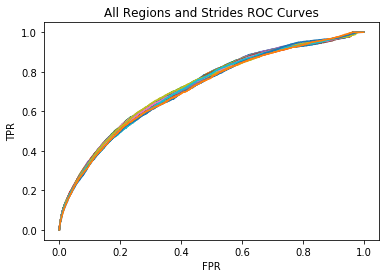

MAX THRESHOLDS:  0.0006186098706008204 0.0003704834813942067 0.0004534238990648494


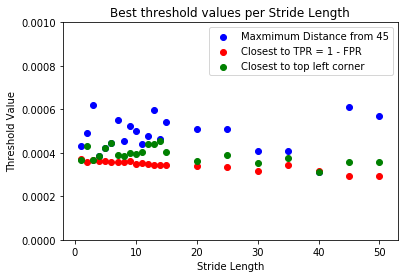

Best AUC is  0.7263232268522021  with stride length  3
Thresholds with stride  3 :
Max Distance from 45:  0.0006186098706008204
Closest to SE=SP:  0.00036823943704266575
Closest to top left:  0.0003647889151009769


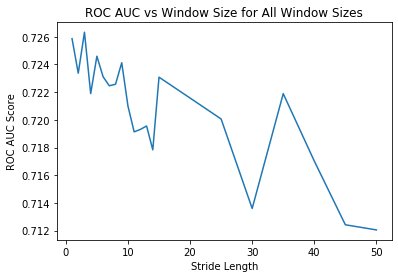

In [36]:
#opening all unlocalized genomic region names
allUnlocalizedRegionNames = open("UnlocalizedNames.txt", "r")
allNames = allUnlocalizedRegionNames.readlines()
allNames = [x.strip() for x in allNames]

def ROCAllRegionsOneStrideLen(list_names, stride):
    allPreds = np.empty(0)
    allTrue = np.empty(0)
    for name in list_names:
        nameNoDot = name.replace(".","_")
        extenedCutPredStem = "./PredictionBinaries/" + name + "Predictions/" + nameNoDot + "_cutPredsStrideLen" 
        try: 
            predForSlide = np.load(extenedCutPredStem + str(stride) + ".npy")
            trueValBoolMask = pas_stuff['seqName'] == name
            currentTrueVals = pas_stuff[trueValBoolMask]
            trueValsArray = np.zeros(predForSlide.size) #create numpy array of all 0's the length of the sequence
            for index, row in currentTrueVals.iterrows():
                trueValsArray[row['start']:row['end']] = 1 #set actual true values to 1 in the array
            #print ("Total true labelled positions: ", np.sum(trueValsArray))
            #print ("Total length of contig: ", trueValsArray.size)
            #print ("Fraction of NT's which are APA sites: ", np.sum(trueValsArray)/trueValsArray.size)
            allTrue = np.concatenate((allTrue,trueValsArray))
            predReshape = np.reshape(predForSlide, trueValsArray.shape)
            allPreds = np.concatenate((allPreds,predReshape))
        except:
            print (name + " NOT COMPLETED OR MISNAMED")   
    print ("Total true labelled positions: ", np.sum(allTrue))
    print ("Total length of all finished contig: ", allTrue.size)
    print ("Fraction of NT's which are APA sites: ", np.sum(allTrue)/allTrue.size)
    fpr,tpr,thresh = sk.metrics.roc_curve(allTrue, allPreds)
    auc_score = sk.metrics.roc_auc_score(allTrue,allPreds)
    print ("AUC SCORE IS: ", auc_score)
    plt.plot(fpr,tpr)
    plt.title("ROC all predictions for stride " + str(stride))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

def ROCAllStrideLengthsAllRegions(names,strides):
    fprs = []
    tprs = []
    threshs = []
    aucs = []
    avgPrecs = []
    dist45 = {'fpr':[], 'tpr':[], 'thresholds':[], 'values':[]}
    minEqual = {'fpr':[], 'tpr':[], 'thresholds':[], 'values':[]}
    topLeft = {'fpr':[], 'tpr':[], 'thresholds':[], 'values':[]}
    confMat = []
    for stride in strides:
        allPreds = np.empty(0)
        allTrue = np.empty(0)
        totalAPA = 0
        for name in names:
            #open predicted values for the file
            nameNoDot = name.replace(".","_")
            extenedCutPredStem = "./PredictionBinaries/" + name + "Predictions/" + nameNoDot + "_cutPredsStrideLen" 
            predForSlide = np.load(extenedCutPredStem + str(stride) + ".npy")
            #open true values for the region
            trueValBoolMask = pas_stuff['seqName'] == name
            currentTrueVals = pas_stuff[trueValBoolMask]
            trueValsArray = np.zeros(predForSlide.size) #create numpy array of all 0's the length of the sequence
            for index, row in currentTrueVals.iterrows():
                trueValsArray[row['start']:row['end']] = 1 #set actual true values to 1 in the array    
                totalAPA += 1
            #append both to the 
            predReshape = np.reshape(predForSlide, trueValsArray.shape)
            allTrue = np.concatenate((allTrue,trueValsArray))
            allPreds = np.concatenate((allPreds,predReshape))
        #make ROC and AUC ROC 
        #print ("Total true labelled positions: ", np.sum(allTrue))
        #print ("Total length of all finished contig: ", allTrue.size)
        #print ("Fraction of NT's which are APA sites: ", np.sum(allTrue)/allTrue.size)
        #print ("Number clusters: ", totalAPA)
        fpr,tpr,thresholds = sk.metrics.roc_curve(allTrue, allPreds)
        auc_score = sk.metrics.roc_auc_score(allTrue,allPreds)
        avgP = sk.metrics.average_precision_score(allTrue,allPreds)
        fprs.append(fpr)
        tprs.append(tpr)
        threshs.append(thresholds)
        aucs.append(auc_score)
        avgPrecs.append(avgP)
        posDistFPR, posDistTPR, posDistThresh, x  = maxPosDist45DegreeLine(fpr,tpr,thresholds)
        dist45['fpr'].append(posDistFPR)
        dist45['tpr'].append(posDistTPR)
        dist45['thresholds'].append(posDistThresh)
        dist45['values'].append(x)
        equalFPR, equalTPR, equalThresh, x  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)
        minEqual['fpr'].append(equalFPR)
        minEqual['tpr'].append(equalTPR)
        minEqual['thresholds'].append(equalThresh)
        minEqual['values'].append(x)
        closeFPR, closeTPR, closeThresh, x  = minDistanceTopLeftCorner(fpr,tpr,thresholds)
        topLeft['fpr'].append(closeFPR)
        topLeft['tpr'].append(closeTPR)
        topLeft['thresholds'].append(closeThresh)
        topLeft['values'].append(x)
        #updating prediction binaries for confusion matrices
        #cM45Preds = []
        #cMMEPreds = []
        ##cMTLPreds = []      
        #cM = sk.metrics.confusion_matrix(allTrue,allPreds)
        #confMat.append(cM)
    return fprs,tprs,threshs,aucs,dist45,minEqual,topLeft, avgPrecs, confMat
    
    
def graphAllROCs(names, sizes):
    fprs,tprs,threshs,aucs,dist45,minEqual,topLeft, avPrec, confusionMat = ROCAllStrideLengthsAllRegions(names, sizes)
    for i in range(0,len(fprs)):
        plt.plot(fprs[i],tprs[i])
    #plt.scatter(dist45['fpr'],dist45['tpr'], c = "blue",label = "Maxmimum Distance from 45")
    #plt.scatter(minEqual['fpr'],minEqual['tpr'], c = "red", label = "Closest to FPR=TPR")
    #plt.scatter(topLeft['fpr'], topLeft['tpr'], c = "green", label = "Closest to (1,1)")
    plt.title("All Regions and Strides ROC Curves")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    #plt.legend()
    plt.show()
    #threshold plots
    print ("MAX THRESHOLDS: ", max(dist45['thresholds']), max(minEqual['thresholds']), max(topLeft['thresholds']))
    plt.scatter(sizes,dist45['thresholds'], c = "blue",label = "Maxmimum Distance from 45")
    plt.scatter(sizes,minEqual['thresholds'], c = "red", label = "Closest to TPR = 1 - FPR")
    plt.scatter(sizes, topLeft['thresholds'], c = "green", label = "Closest to top left corner")
    plt.title("Best threshold values per Stride Length")
    plt.xlabel("Stride Length")
    plt.ylabel("Threshold Value")
    plt.ylim(0,0.001)
    plt.legend()
    plt.show()
    bestAUCStride = sizes[aucs.index(max(aucs))]
    print ("Best AUC is ", max(aucs), " with stride length ",bestAUCStride )
    print ("Thresholds with stride ", bestAUCStride, ":")
    print ("Max Distance from 45: ", dist45['thresholds'][aucs.index(max(aucs))])
    print ("Closest to SE=SP: ", minEqual['thresholds'][aucs.index(max(aucs))])
    print ("Closest to top left: ", topLeft['thresholds'][aucs.index(max(aucs))])
    #print ("Confusion matrix for best ", confusionMat[aucs.index(max(aucs))])
    #graph distribution of aucs
    plt.plot(sizes,aucs)
    #plt.plot(sizes, avPrec)
    plt.title("ROC AUC vs Window Size for All Window Sizes")
    plt.xlabel("Stride Length")
    plt.ylabel("ROC AUC Score")
    plt.show()
    #print ("Max avg precision is: ", max(avPrec))
        
        
#ROCAllRegionsOneStrideLen(allNames, 50)
graphAllROCs(allNames, strideSizes) 